In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,classification_report

In [10]:
df = pd.read_csv("D:\IITJ\IV Sem/4.1 Pattern Recognition and Machine Learning/4.1.5 PRML_Project/Face_Recognition/csvs/hog_95/extracted_features_hog_95.csv",header =None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3239,3240,3241,3242,3243,3244,3245,3246,3247,3248
0,Rachel_Leigh_Cook,0.101289,1.330157,-0.964354,0.278769,-0.543510,1.725658,-0.641089,-0.416891,-0.197742,...,52.0,689.0,2015.0,543.0,19.0,301.0,450.0,355.0,289.0,11011.0
1,Roseanne_Barr,0.391125,0.704784,1.217563,-0.780129,-1.414380,0.959051,1.196409,1.637598,0.144761,...,44.0,654.0,1721.0,548.0,26.0,416.0,510.0,451.0,378.0,7875.0
2,Vladimir_Putin,-1.246895,-0.680080,0.591671,-2.354134,-1.920589,-0.013368,0.060721,-0.179192,1.438939,...,35.0,504.0,3792.0,564.0,27.0,420.0,679.0,460.0,611.0,17388.0
3,Carlos_Menem,0.597257,-0.661087,1.356273,-0.878202,-0.588220,-0.435263,-0.077499,-0.152108,0.537329,...,53.0,495.0,1593.0,566.0,34.0,343.0,563.0,399.0,338.0,9557.0
4,Lynne_Thigpen,-1.589231,-0.049223,-1.306154,-0.461846,0.250779,-2.198609,-0.026885,0.607296,-0.321626,...,39.0,520.0,1744.0,502.0,24.0,339.0,531.0,398.0,394.0,14844.0


In [4]:
df_test = pd.read_csv("csvs/hog_95/extracted_features_test_hog_95.csv",header=None)
df = pd.concat([df,df_test],axis = 0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13233 entries, 0 to 2646
Columns: 3249 entries, 0 to 3248
dtypes: float64(3248), object(1)
memory usage: 328.1+ MB


##### Restricting the minimum no of samples per class to be 50

In [85]:
df_modified_50 = df[df[0].map(df[0].value_counts()) >= 50]
# Reference Stack overflow

In [86]:
df_modified_50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1560 entries, 6 to 2641
Columns: 3249 entries, 0 to 3248
dtypes: float64(3248), object(1)
memory usage: 38.7+ MB


In [87]:
df_modified_50[0].unique().shape

(12,)

In [88]:
Features = df_modified_50.drop(0,axis = 1)
print(Features.shape)
target = df_modified_50[0]
print(target.shape)

(1560, 3248)
(1560,)


In [89]:
Features_HoG_95 = Features.loc[:,:946]
Features_CNN = Features.loc[:,946:2993]
Features_LBP = Features.loc[:,2993:]

In [90]:
print("No of CNN features: ",Features_CNN.shape[1])
print("No of HoG features covering 0.95 variance: ",Features_HoG_95.shape[1])
print("No of LBP Features are: ",Features_LBP.shape[1])

No of CNN features:  2048
No of HoG features covering 0.95 variance:  946
No of LBP Features are:  256


Default Hyperparameters training on LBP Features

In [91]:
X_train_LBP, X_test_LBP, y_train_LBP,y_test_LBP = train_test_split(Features_LBP,target,train_size=0.8,random_state=42)

In [92]:
model_LBP_default = RandomForestClassifier()

In [93]:
model_LBP_default.fit(X_train_LBP,y_train_LBP)

RandomForestClassifier()

In [94]:
y_predicted_LBP = model_LBP_default.predict(X_test_LBP)

In [95]:
print(accuracy_score(y_true=y_test_LBP,y_pred=y_predicted_LBP))

0.3301282051282051


Default Hyperparameters training on CNN features

In [96]:
X_train_CNN,X_test_CNN,y_train_CNN,y_test_CNN = train_test_split(Features_CNN,target,train_size=0.8,random_state=42)

In [97]:
model_CNN_default = RandomForestClassifier()

In [98]:
model_CNN_default.fit(X_train_CNN,y_train_CNN)

RandomForestClassifier()

In [99]:
y_predicted_CNN = model_CNN_default.predict(X_test_CNN)

In [100]:
print(accuracy_score(y_true=y_test_CNN,y_pred=y_predicted_CNN))

0.4775641025641026


Default Hyperparameters training using HoG Features

In [101]:
X_train_HoG,X_test_HoG,y_train_HoG,y_test_HoG = train_test_split(Features_HoG_95,target,train_size=0.8,random_state=42)

In [102]:
model_HoG_default = RandomForestClassifier()

In [103]:
model_HoG_default.fit(X_train_HoG,y_train_HoG)

RandomForestClassifier()

In [104]:
y_predicted_HoG = model_HoG_default.predict(X_test_HoG)

In [105]:
print(accuracy_score(y_true=y_test_HoG,y_pred=y_predicted_HoG))

0.34935897435897434


In [134]:
X_train_50,X_test_50,y_train_50,y_test_50 = train_test_split(Features,target,train_size=0.8,random_state=42)

In [135]:
model_ALL_default = RandomForestClassifier()
model_ALL_default.fit(X_train_50,y_train_50)
y_predicted_ALL_50 = model_ALL_default.predict(X_test_50)
print(accuracy_score(y_true=y_test_50,y_pred=y_predicted_ALL_50))

0.4166666666666667


In [162]:
accuracies_max_depth_tuning = []
best_model = None
max_accuracy = 0
max_depth = [100,200,500,1000,1050,1100,1500,2000,2500,3000]
for depth in max_depth:

    model = RandomForestClassifier(max_depth=depth)
    model.fit(X_train_50,y_train_50)
    y_pred = model.predict(X_test_50)

    accuracy = accuracy_score(y_pred=y_pred,y_true=y_test_50)
    print("Accuracy with ",depth,' ',accuracy)

    accuracies_max_depth_tuning.append(accuracy)
    if(accuracy > max_accuracy):
        best_model = model
        max_accuracy = accuracy

Accuracy with  100   0.42948717948717946
Accuracy with  200   0.4391025641025641
Accuracy with  500   0.42948717948717946
Accuracy with  1000   0.4423076923076923
Accuracy with  1050   0.4358974358974359
Accuracy with  1100   0.44871794871794873
Accuracy with  1500   0.44551282051282054
Accuracy with  2000   0.40384615384615385
Accuracy with  2500   0.4551282051282051
Accuracy with  3000   0.42628205128205127


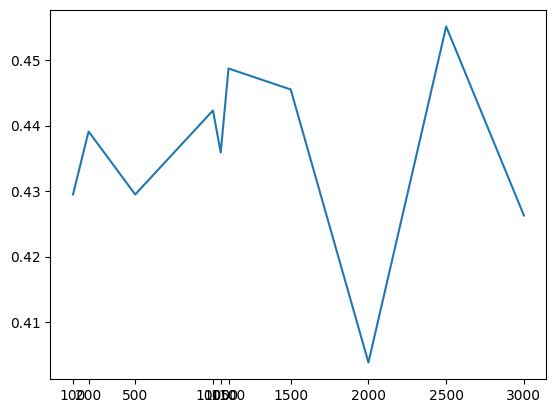

In [163]:
plt.plot(max_depth,accuracies_max_depth_tuning)
plt.xticks(max_depth)
plt.show()

In [159]:
accuracies_min_leaves_tuning = []
best_model_leaves = None
max_accuracy = 0
min_leaves = [2,4,6,8,10,12]
for leaves in min_leaves:

    model = RandomForestClassifier(min_samples_leaf=leaves)
    model.fit(X_train_50,y_train_50)
    y_pred = model.predict(X_test_50)

    accuracy = accuracy_score(y_pred=y_pred,y_true=y_test_50)
    print("Accuracy with ",leaves,' ',accuracy)

    accuracies_min_leaves_tuning.append(accuracy)
    if(accuracy > max_accuracy):
        best_model_leaves = model
        max_accuracy = accuracy

Accuracy with  2   0.44551282051282054
Accuracy with  4   0.4198717948717949
Accuracy with  6   0.40384615384615385
Accuracy with  8   0.4230769230769231
Accuracy with  10   0.3974358974358974
Accuracy with  12   0.38461538461538464


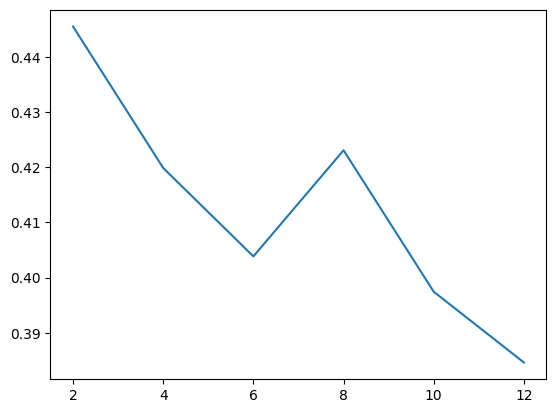

In [161]:
plt.plot(min_leaves,accuracies_min_leaves_tuning)
plt.xticks(min_leaves)
plt.show()

In [171]:
accuracies_n_estimators = []
best_model_n_estimator = None
max_accuracy = 0
n_estimator = [10,20,50,100,200,500,1000]
for estimator in n_estimator:
    
    model = RandomForestClassifier(n_estimators=estimator)
    model.fit(X_train_50,y_train_50)
    y_pred = model.predict(X_test_50)

    accuracy = accuracy_score(y_pred=y_pred,y_true=y_test_50)
    print("Accuracy with ",estimator,' ',accuracy)

    accuracies_n_estimators.append(accuracy)
    if(accuracy > max_accuracy):
        best_model_n_estimator = model
        max_accuracy = accuracy

Accuracy with  10   0.3942307692307692
Accuracy with  20   0.4166666666666667
Accuracy with  50   0.4358974358974359
Accuracy with  100   0.44551282051282054
Accuracy with  200   0.4326923076923077
Accuracy with  500   0.4198717948717949
Accuracy with  1000   0.4230769230769231


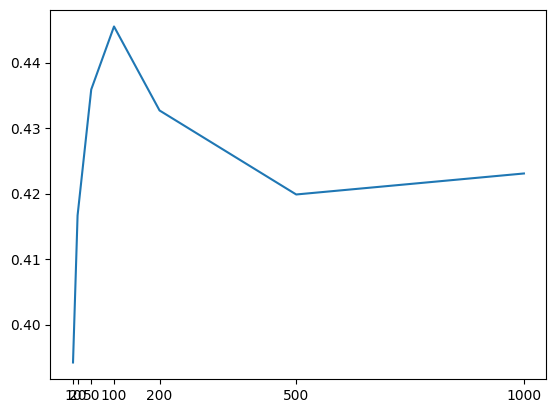

In [172]:
plt.plot(n_estimator,accuracies_n_estimators)
plt.xticks(n_estimator)
plt.show()

In [176]:
accuracies_max_leaf_nodes = []
best_model_max_leaf_nodes = None
max_accuracy = 0
max_leaf_nodes = [2,4,6,8,10,12,20,22,25,30]
for max_leaf_node in max_leaf_nodes:
    
    model = RandomForestClassifier(max_leaf_nodes=max_leaf_node)
    model.fit(X_train_50,y_train_50)
    y_pred = model.predict(X_test_50)

    accuracy = accuracy_score(y_pred=y_pred,y_true=y_test_50)
    print("Accuracy with ",max_leaf_node,' ',accuracy)

    accuracies_max_leaf_nodes.append(accuracy)
    if(accuracy > max_accuracy):
        best_model_max_leaf_nodes = model
        max_accuracy = accuracy

Accuracy with  2   0.2948717948717949
Accuracy with  4   0.3108974358974359
Accuracy with  6   0.32051282051282054
Accuracy with  8   0.3333333333333333
Accuracy with  10   0.34615384615384615
Accuracy with  12   0.3557692307692308
Accuracy with  20   0.36538461538461536
Accuracy with  22   0.3814102564102564
Accuracy with  25   0.38461538461538464
Accuracy with  30   0.3814102564102564


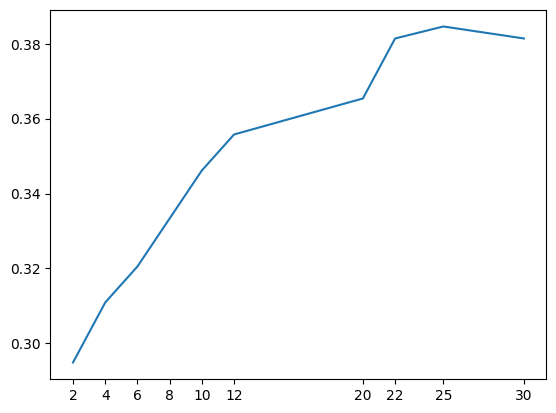

In [177]:
plt.plot(max_leaf_nodes,accuracies_max_leaf_nodes)
plt.xticks(max_leaf_nodes)
plt.show()

In [182]:
params = {"max_depth":[2500,2550,2450],"min_samples_leaf":[2,3],"n_estimators":[95,100,105],"max_leaf_nodes":[22,23,24,25,26]}

In [183]:
best_model = RandomForestClassifier()

In [184]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,verbose=2)
grid_search.fit(X_train_50,y_train_50)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END max_depth=2500, max_leaf_nodes=22, min_samples_leaf=2, n_estimators=95; total time=   1.7s
[CV] END max_depth=2500, max_leaf_nodes=22, min_samples_leaf=2, n_estimators=95; total time=   1.7s
[CV] END max_depth=2500, max_leaf_nodes=22, min_samples_leaf=2, n_estimators=95; total time=   1.8s
[CV] END max_depth=2500, max_leaf_nodes=22, min_samples_leaf=2, n_estimators=95; total time=   2.2s
[CV] END max_depth=2500, max_leaf_nodes=22, min_samples_leaf=2, n_estimators=95; total time=   2.0s
[CV] END max_depth=2500, max_leaf_nodes=22, min_samples_leaf=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=2500, max_leaf_nodes=22, min_samples_leaf=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=2500, max_leaf_nodes=22, min_samples_leaf=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=2500, max_leaf_nodes=22, min_samples_leaf=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=2500, max_leaf_

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2500, 2550, 2450],
                         'max_leaf_nodes': [22, 23, 24, 25, 26],
                         'min_samples_leaf': [2, 3],
                         'n_estimators': [95, 100, 105]},
             verbose=2)

In [186]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 2450, 'max_leaf_nodes': 26, 'min_samples_leaf': 3, 'n_estimators': 95}
0.4567453815261044


In [231]:
best_model_ALL_50 = RandomForestClassifier(max_depth=1050,n_estimators=105,min_samples_leaf = 2,max_leaf_nodes=1100)
best_model_ALL_50.fit(X_train_50,y_train_50)
y_predicted_best = best_model_ALL_50.predict(X_test_50)
best_accuracy = accuracy_score(y_true=y_test_50,y_pred = y_predicted_best)
print("Best Accuracy: ",best_accuracy)

Best Accuracy:  0.4391025641025641


In [234]:
best_model_ALL_50 = RandomForestClassifier(max_depth=1050,n_estimators=105,min_samples_leaf = 2,max_leaf_nodes=1100)
best_model_ALL_50.fit(X_train_CNN,y_train_CNN)
y_predicted_best = best_model_ALL_50.predict(X_test_CNN)
best_accuracy = accuracy_score(y_true=y_test_CNN,y_pred = y_predicted_best)
print("Best Accuracy: ",best_accuracy)

Best Accuracy:  0.4807692307692308


In [200]:
best_model_ALL_50 = grid_search.best_estimator_
best_accuracy = accuracy_score(y_pred = best_model_ALL_50.predict(X_test_50),y_true=y_test_50)
print("Best Accuracy: ",best_accuracy)


Best Accuracy:  0.38461538461538464


##### If Minimum number of samples per class is increased to 70

In [106]:
df_modified_70 = df[df[0].map(df[0].value_counts()) >= 70]

In [122]:
Features_70 = df_modified_70.drop(0,axis=1)
target_70 = df_modified_70[0]

Features_HoG_95_70 = Features_70.loc[:,:946]
Features_CNN_70 = Features_70.loc[:,946:2993]
Features_LBP_70  = Features_70.loc[:,2993:]

Default Hyper parameters training for LBP Features

In [123]:
X_train_LBP_70,X_test_LBP_70,y_train_LBP_70,y_test_LBP_70 = train_test_split(Features_LBP_70,target_70,train_size=0.8,random_state=42)

In [124]:
model_LBP_default_70 = RandomForestClassifier()

In [125]:
model_LBP_default_70.fit(X_train_LBP_70,y_train_LBP_70)

RandomForestClassifier()

In [126]:
y_predicted_LBP_70 = model_LBP_default_70.predict(X_test_LBP_70)

In [127]:
print(accuracy_score(y_true = y_test_LBP_70,y_pred = y_predicted_LBP_70))

0.4418604651162791


Default Hyper parameters training for CNN Features

In [128]:
X_train_CNN_70,X_test_CNN_70,y_train_CNN_70,y_test_CNN_70 = train_test_split(Features_CNN_70,target_70,train_size=0.8,random_state=42)

In [129]:
model_CNN_default_70 = RandomForestClassifier()
model_CNN_default_70.fit(X_train_CNN_70,y_train_CNN_70)

RandomForestClassifier()

In [130]:
y_predicted_CNN_70 = model_CNN_default_70.predict(X_test_CNN_70)
print(accuracy_score(y_true=y_test_CNN_70,y_pred = y_predicted_CNN_70))

0.5813953488372093


Default Hyper parameters training for HoG Features covering 0.95 Variance

In [131]:
X_train_HoG_70,X_test_HoG_70,y_train_HoG_70,y_test_HoG_70 = train_test_split(Features_HoG_95_70,target_70,train_size=0.8,random_state=42)

In [132]:
model_HoG_default_70 = RandomForestClassifier()
model_HoG_default_70.fit(X_train_HoG_70,y_train_HoG_70)

RandomForestClassifier()

In [133]:
y_predicted_HoG_70 = model_HoG_default_70.predict(X_test_HoG_70)
print(accuracy_score(y_true=y_test_HoG_70,y_pred=y_predicted_HoG_70))

0.4186046511627907


In [136]:
X_train_70,X_test_70,y_train_70,y_test_70 = train_test_split(Features_70,target_70,train_size=0.8,random_state=42)

In [137]:
model_ALL_default_70 = RandomForestClassifier()
model_ALL_default_70.fit(X_train_70,y_train_70)
y_predicted_ALL_70 = model_ALL_default_70.predict(X_test_70)
print(accuracy_score(y_true=y_test_70,y_pred=y_predicted_ALL_70))

0.5465116279069767


In [262]:
best_model_CNN_70 = RandomForestClassifier(max_depth=1050,n_estimators=105,min_samples_leaf = 2,max_leaf_nodes=1200)
best_model_CNN_70.fit(X_train_CNN_70,y_train_CNN_70)
y_predicted_best = best_model_CNN_70.predict(X_test_CNN_70)
best_accuracy = accuracy_score(y_true=y_test_CNN_70,y_pred = y_predicted_best)
print("Best Accuracy: ",best_accuracy)

Best Accuracy:  0.5968992248062015
